In [59]:
import numpy as np
import matplotlib.pyplot as plt

(512, 512)


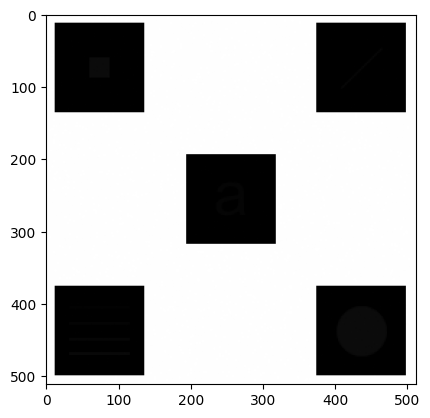

In [60]:
khoivuong = plt.imread("Khoi-hinh-vuong.tif")

plt.imshow(khoivuong, cmap='gray')

print(khoivuong.shape)

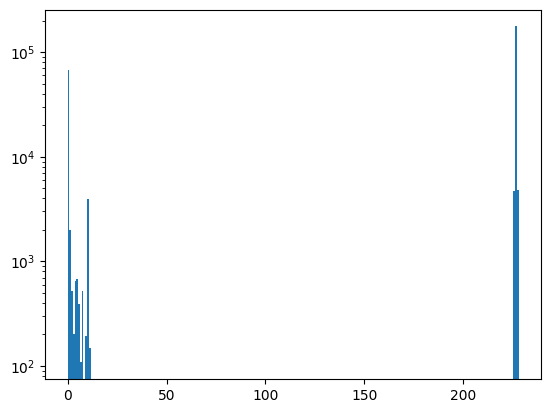

In [61]:
plt.hist(khoivuong.ravel(), bins=256)
plt.yscale("log")
plt.show()

(0.0, 20.0)

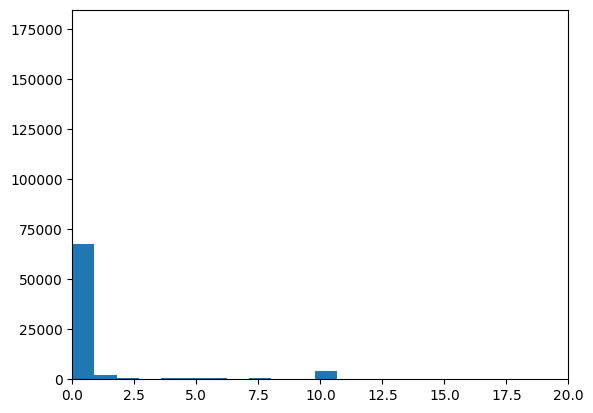

In [62]:
plt.hist(khoivuong.ravel(), bins=256)
plt.xlim(0, 20)

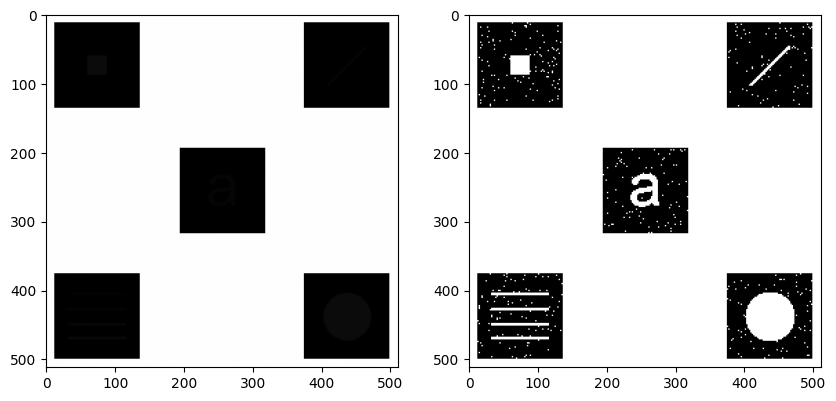

In [63]:
khoivuong_2 = khoivuong.copy()

for i in range(khoivuong_2.shape[0]):
    for j in range(khoivuong_2.shape[1]):
        if khoivuong_2[i,j] > 0 and khoivuong_2[i, j] < 256:
            khoivuong_2[i, j] = 255

plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(khoivuong, cmap="gray")
plt.subplot(122)
plt.imshow(khoivuong_2, cmap="gray")

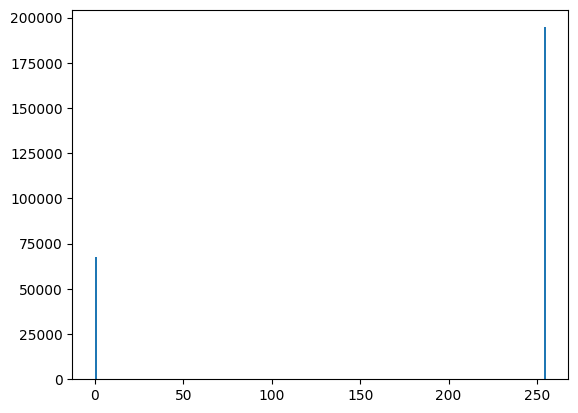

In [64]:
plt.hist(khoivuong_2.ravel(), bins=256)
plt.show()

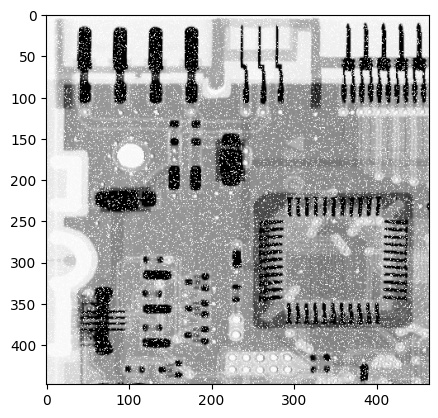

In [65]:
salt = plt.imread("circuit-board-salt-prob-pt1.tif")

plt.imshow(salt, cmap='gray')

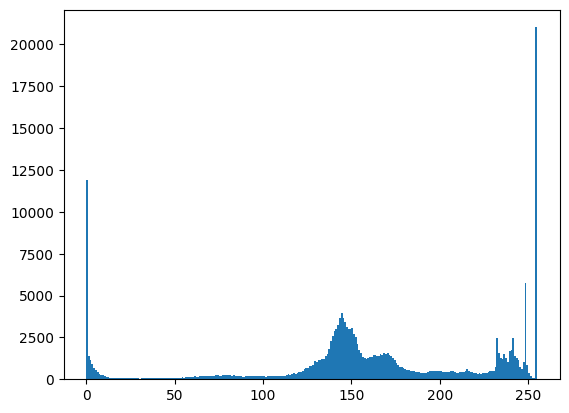

In [66]:
plt.hist(salt.ravel(), np.max(salt))
plt.show()

In [67]:
std = np.std(salt.ravel())
std

70.92837721609398

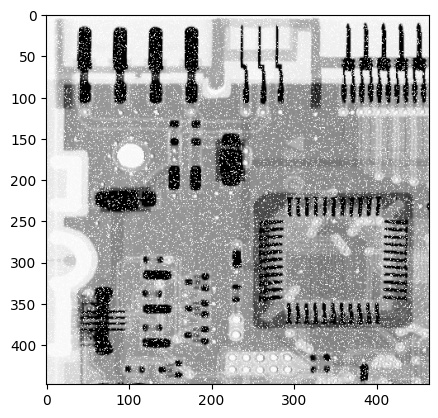

In [68]:
salt_2 = salt.copy()

for i in range(salt_2.shape[0]):
    for j in range(salt_2.shape[1]):
        if salt_2[i, j] > 255 and salt_2[i, j] <= np.max(salt_2):
            salt_2[i, j] = salt_2[i, j] - 50

plt.imshow(salt_2, cmap='gray')

In [69]:
def amban(img):
    return np.max(img) - img

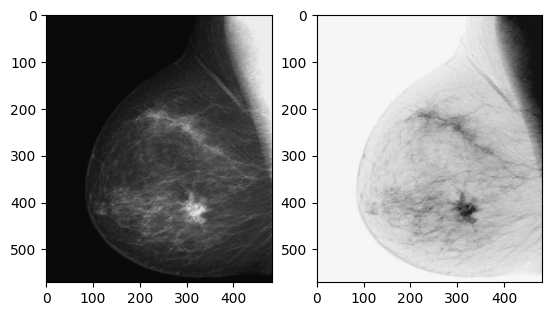

In [70]:
img1 = plt.imread("breast_digital_Xray.tif")
img1_amban = amban(img1)

plt.subplot(121)
plt.imshow(img1, cmap='gray')

plt.subplot(122)
plt.imshow(img1_amban, cmap='gray')

In [71]:
def log_img(img):
    output = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] > 0:
                output[i, j] = np.log((output[i, j])).astype(np.float32)
    return output

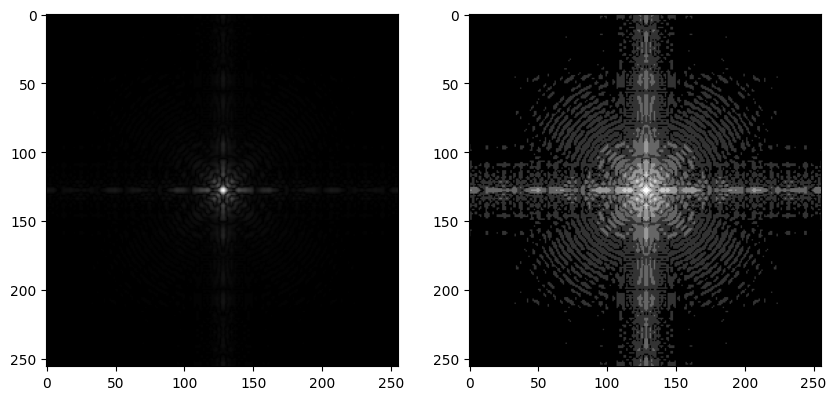

In [72]:
img2 = plt.imread("Bien_doi_log.tif")
img2_log = log_img(img2)

plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(img2, cmap='gray')

plt.subplot(122)
plt.imshow(img2_log, cmap='gray')

In [73]:
def gamma(c, factor, img):
    return c*img**factor

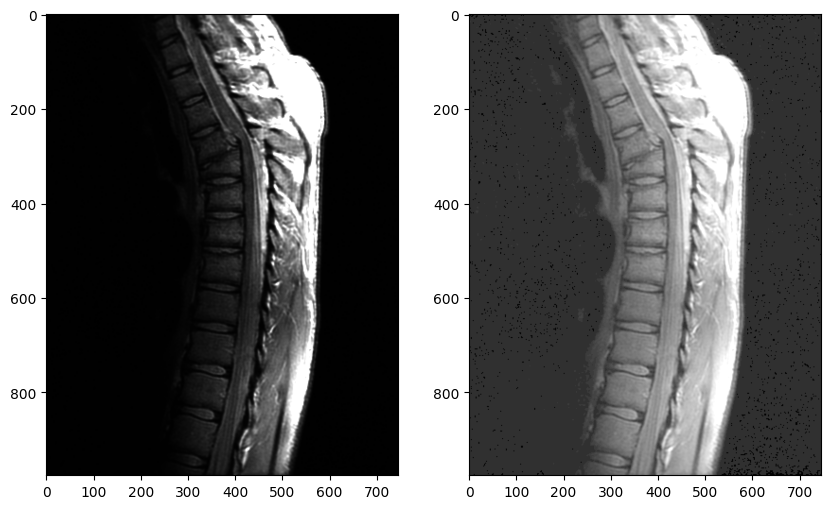

In [74]:
gamma1 = plt.imread('fractured_spine.tif')
gamma2 = gamma(1, 0.3, gamma1)

plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(gamma1, cmap='gray')

plt.subplot(122)
plt.imshow(gamma2, cmap='gray')

In [75]:
# Bien doi tuyen tinh tung doan
def tuyentinh(img):
    ra = img.min()
    rb = img.max()
    L = 2**8
    c = (L-1) / (rb-ra)
    m = (1-L) * ra / (rb-ra)
    return c*img + m

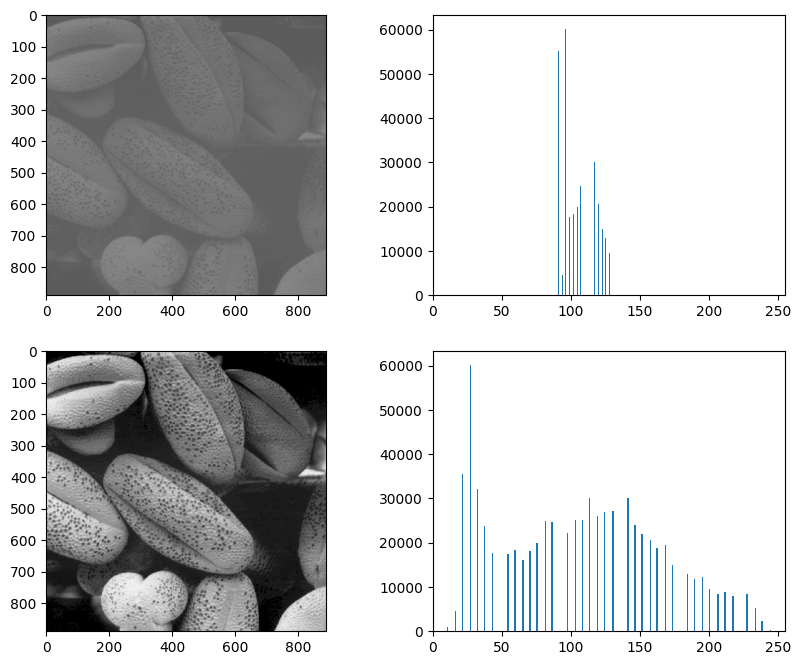

In [76]:
pollen = plt.imread("pollen_image.tif")
pollen_tuyentinh = tuyentinh(pollen)

plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.imshow(pollen, cmap='gray', vmin=0, vmax=255)

plt.subplot(222)
plt.hist(pollen.ravel(), 255)
plt.xlim(0, 255)

plt.subplot(223)
plt.imshow(pollen_tuyentinh, cmap='gray', vmin=0, vmax=255)

plt.subplot(224)
plt.hist(pollen_tuyentinh.ravel(), 255)
plt.xlim(0, 255)

plt.show()

In [77]:
# Can bang 
def canbang_hist(img):
    return (img-img.min())*255.0/(img.max() - img.min())

def canbang_hist_2(img):
    value, count = np.unique(img.ravel(), return_counts=True)
    return (img-img.min())*(255.0/(value.max() - value.min()))

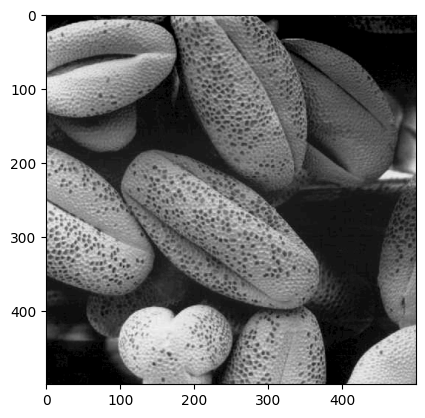

In [78]:
import seaborn as sns
img3 = plt.imread("pollen_thieu_sang.tif")

img3_2_2 = canbang_hist_2(img3)
plt.imshow(img3_2_2, cmap='gray')
#sns.histplot(img3_2_2.ravel(), bins=100)

(0.0, 255.0)

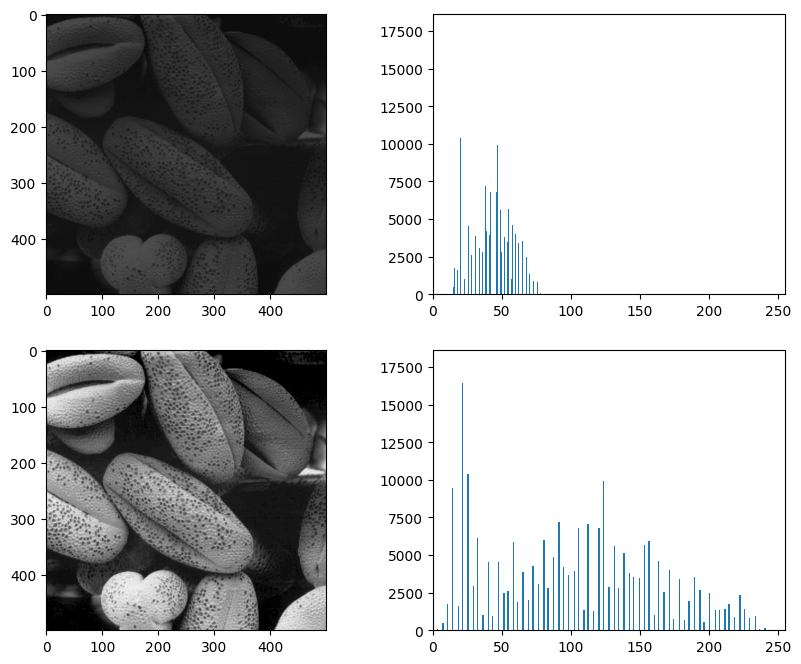

In [79]:
img3_2 = canbang_hist(img3)


plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(222)
plt.hist(img3.ravel(), 255)
plt.xlim(0, 255)

plt.subplot(223)
plt.imshow(img3_2, cmap='gray', vmin=0, vmax=255)

plt.subplot(224)
plt.hist(img3_2.ravel(), 255)
plt.xlim(0, 255)

(0.0, 255.0)

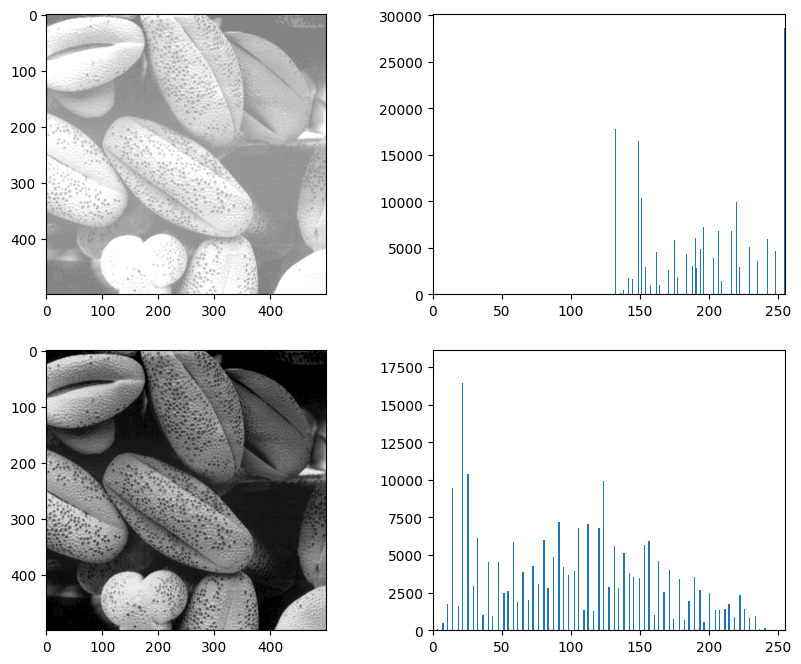

In [80]:
img4 = plt.imread("pollen_thua_sang.tif")
img4_2 = canbang_hist(img3)

plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

plt.subplot(222)
plt.hist(img4.ravel(), 255)
plt.xlim(0, 255)

plt.subplot(223)
plt.imshow(img4_2, cmap='gray', vmin=0, vmax=255)

plt.subplot(224)
plt.hist(img4_2.ravel(), 255)
plt.xlim(0, 255)

In [81]:
from skimage.exposure import cumulative_distribution

def Hist_image(img):
    h = [(img==v).sum() for v in range(256)]
    hist = np.array(h) # Histogram
    norm = hist/hist.sum() # Normalized histogram
    return hist, norm

def cdf_img(img):
    cdf = np.zeros((256, ))
    _, norm = Hist_image(img)
    for i in range(256):
        cdf[i] = norm[i] + cdf[i-1]
    return cdf

def Hist_cdf_img_3D(img):
    hist_store = []
    norm_store = []
    cdf_strore = []
    for i in range(3):
        hist_value, norm_value = Hist_image(img[:,:,i].astype(np.float32))
        cdf_value = cdf_img(img[:,:,i].astype(np.float32))
        hist_store.append(hist_value)
        norm_store.append(norm_value)
        cdf_strore.append(cdf_value)
    return np.array(hist_store), np.array(norm_store), np.array(cdf_strore)

def hist_matching(img, img_t):
    c = cdf_img(img)
    c_t = cdf_img(img_t)
    pixels = np.arange(256)
    new_pixels = np.interp(c, c_t, pixels)
    img = (np.reshape(new_pixels[img.ravel()], img.shape)).astype(np.uint32)
    return img


In [82]:
img4_4 = hist_matching(img4, img4_2)

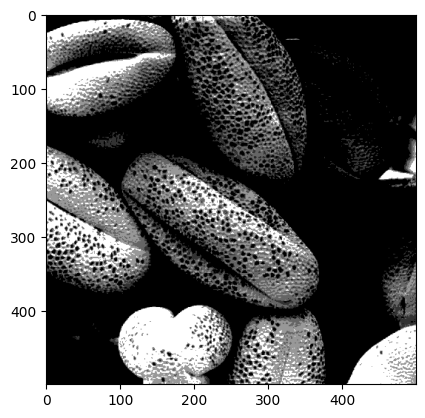

In [84]:
plt.imshow(img4_4, cmap='gray')

<Axes: ylabel='Count'>

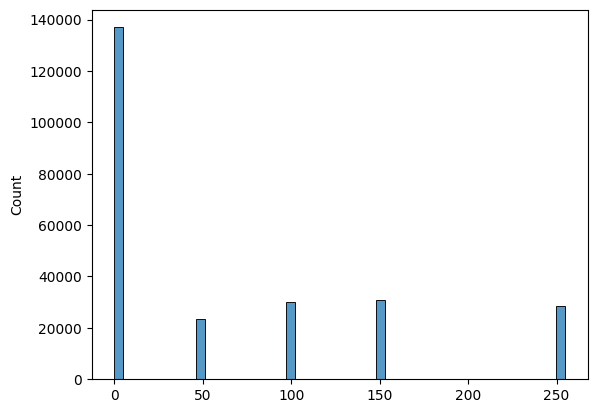

In [85]:
sns.histplot(img4_4.ravel(), bins=50)